# I. Numpy

### Импортируйте NumPy

In [80]:
import numpy as np
import warnings


warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [48]:
a = np.zeros((1, 10))
a[0, 4] = 1
a.reshape(2, 5)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [49]:
b = np.arange(10, 50)
b1 = b[::-1]
b1[1::2]

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [50]:
c = np.arange(0, 9)
c.reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [51]:
#перый способ
d = np.empty((( 4, 3, 2)))
max_element = np.max(d)
min_element = np.min(d)
print(max_element)
print(min_element)

1.0
0.11840023306916837


In [52]:
#второй способ
d2 = np.random.rand( 4, 3, 2)
max_element_2 = np.max(d2)
min_element_2 = np.min(d2)
print(max_element_2)
print(min_element_2)

0.9692155700563518
0.02353332944280051


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [53]:
f = np.arange(0, 24)
f.resize(6,4)
f1 = np.arange(1, 13)
f1.resize(4, 3)
f.dot(f1)

array([[ 48,  54,  60],
       [136, 158, 180],
       [224, 262, 300],
       [312, 366, 420],
       [400, 470, 540],
       [488, 574, 660]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [81]:
j = np.empty((( 7, 7)))
average = j.mean()
std = j.std()
data_norm = (j - j.min()) / (j.max() - j.min())
(average, std, data_norm)

(0.0,
 0.0,
 array([[nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan]]))

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [56]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [57]:
import pandas as ps
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


### Загрузите датасет Tips из набора датасетов seaborn

In [58]:
tips = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [59]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [60]:
tips.shape

(244, 7)

In [61]:
length = len(tips)
num_colon = len(tips.columns.values.tolist())
(length, num_colon)

(244, 7)

### Проверьте есть ли пропуски в данных

In [62]:
tips.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [63]:
#tips_null = tips(map(lambda: x tips.isna() else))
tips['tip'].isna()[120:150]

120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Name: tip, dtype: bool

### Посмотрите на распределение числовых признаков

In [64]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [65]:
tips.total_bill.max()

50.81

### Найдите количество курящих людей

In [66]:
#tips['smoker'].value_counts()
#result = tips.groupby('smoker').filter(lambda x: x == "Yes")
result =len(tips[tips['smoker'] == "Yes"].values)
result


93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [67]:
tips.groupby('day')['total_bill'].mean().sort_values()

day
Fri     17.151579
Thur    17.682742
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [68]:
#tips.groupby('sex')[tips['total_bill'] > (tips['total_bill'].median())]
tips[tips['total_bill'] > (tips['total_bill'].median())]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [70]:
#Первый вариант
s = sns.load_dataset('tips')
tips.smoker = tips.smoker.replace({ 'No' : 0 , "Yes" : 1 })


In [71]:
#Второй вариант
tips['smoker'].map(lambda x: 0 if x == 'No' else 1)

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: smoker, Length: 244, dtype: int64

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

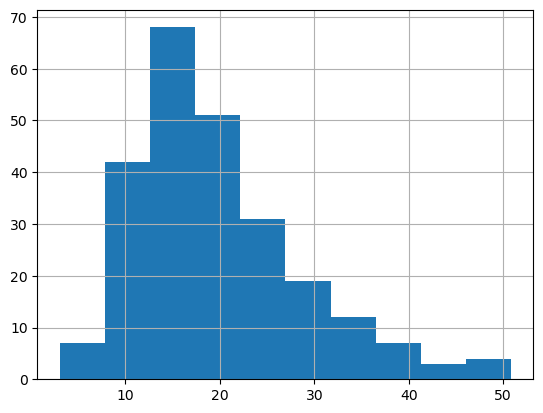

In [72]:
tips['total_bill'].hist();

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

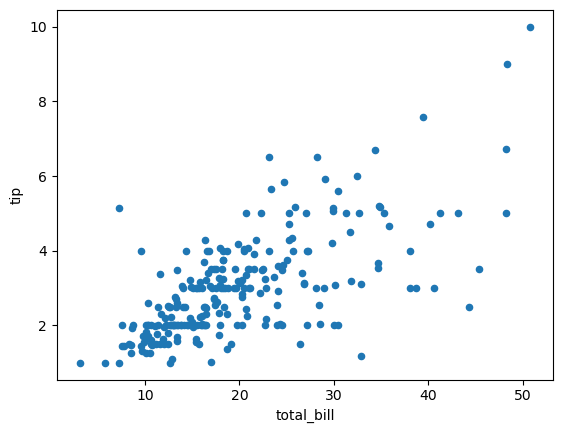

In [73]:
tips.plot.scatter(x='total_bill', y='tip');

### Постройте pairplot

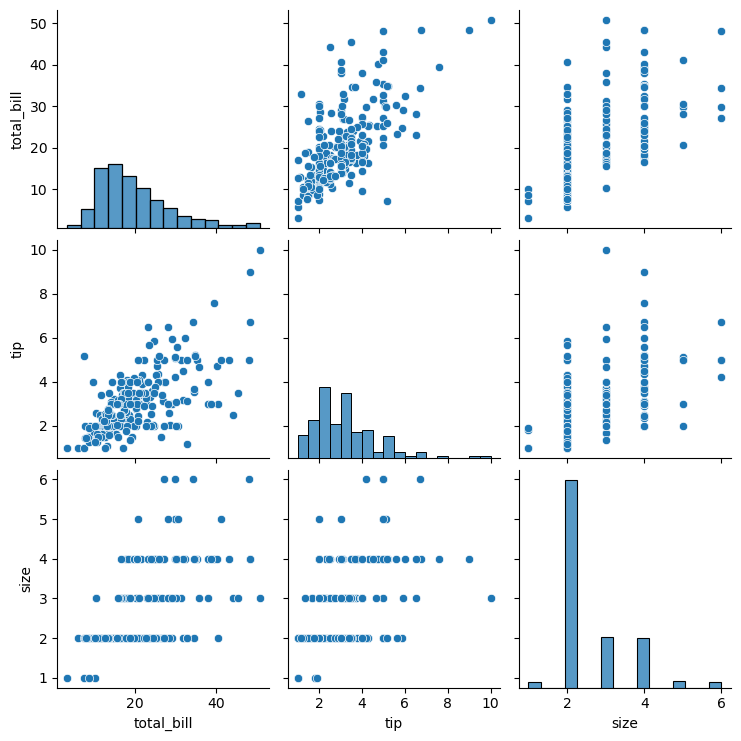

In [74]:
#tips.isna()
#df = tips.replace(np.inf, np.nan)
#tips.fillna(np.nan)
#sns.pairplot(tips.apply(lambda x: x.replace([np.inf, -np.inf], np.nan)).dropna(), height=2.5)
#plt.show()


#type(tips)
#df = tips.fillna(np.nan)
sns.pairplot(tips);
#tips['tip'].replace(np.inf, np.nan)
#tips['total_bill'].replace(np.inf, np.nan)
#sns.pairplot(tips);

#sns.pairplot(tips);

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

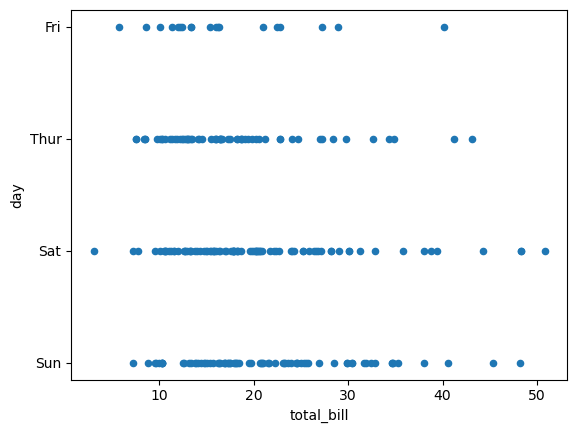

In [88]:
tips.plot.scatter(x='total_bill', y='day');
#sns.scatterplot(x='total_bill', y='tip', hue='day', data=tips );
#sns.histplot(x='total_bill', hue='day', data=tips)

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

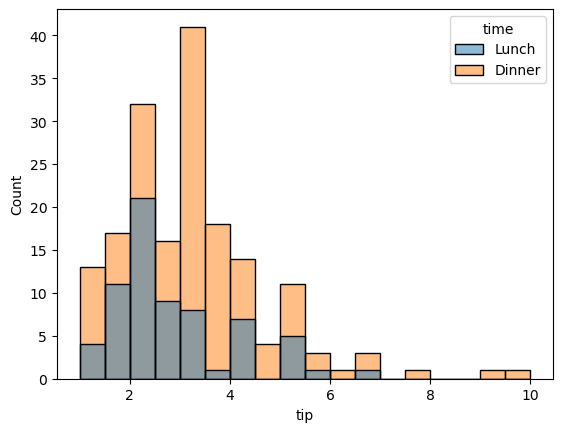

In [76]:
#tips.plot.scatter(x='tip', y='time').hist();
#tips_transform = tips.unstack()
#tips_transform.plot.barh(stacked=True);
#tips[['time', 'sex']].plot.hist(alpha=0.5);

#result_tip_by_time = tips.groupby('time')['tip'].value_counts()
#result_tip_by_time

#sns.histplot(result_tip_by_time);
#result_tip_by_time.plot(x='tip', y='time').hist();
#result_tip_by_time.plot.hist();
#kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
#plt.hist(result_tip_by_time['Dinner'], **kwargs)
#plt.hist(result_tip_by_time['Launch'], **kwargs)
#tips.plot.scatter(x='tip', y='time', hue='time').hist()
#sns.lineplot(x='tip', hue='time', data=tips).hist()
#sns.scatterplot(x='tip', y='time', hue='time', data=tips).hist()
#sns.relplot(x='total_bill', y='tip', hue='time', col='time', data=tips).hist()

sns.histplot(x='tip', hue='time', data=tips)
plt.show()


### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

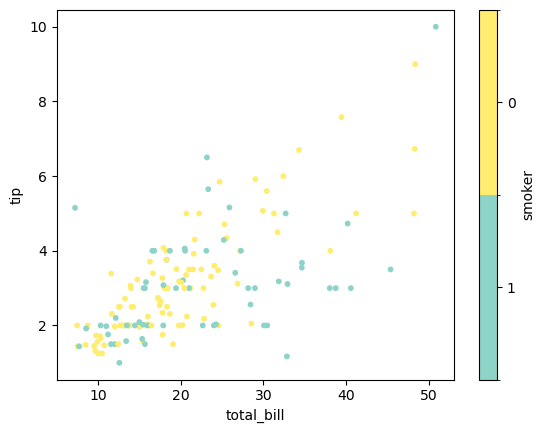

In [77]:
tips_male = tips[tips['sex'] == 'Male' ]
tips_male.plot.scatter(x='total_bill', y='tip', c = 'smoker', cmap = "Set3", s=10 );

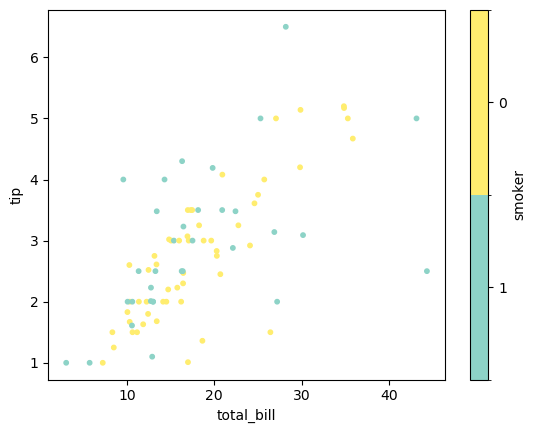

In [78]:
tips_female = tips[tips['sex'] == 'Female' ]
tips_female.plot.scatter(x='total_bill', y='tip', c = 'smoker', cmap = "Set3", s=10 );

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

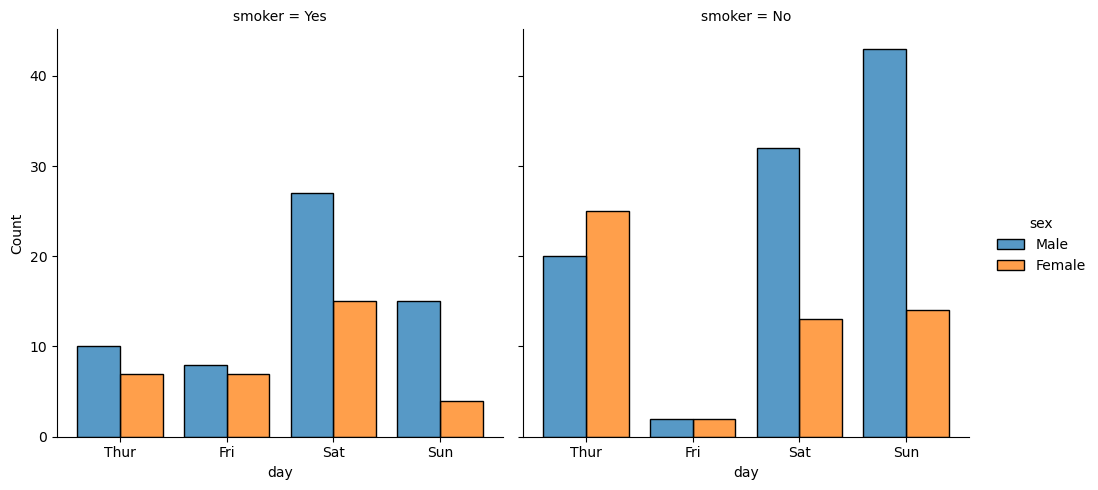

In [40]:
sns.displot(data=tips, x='day', hue='sex', multiple='dodge', shrink=0.8, kind='hist', col='smoker')
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

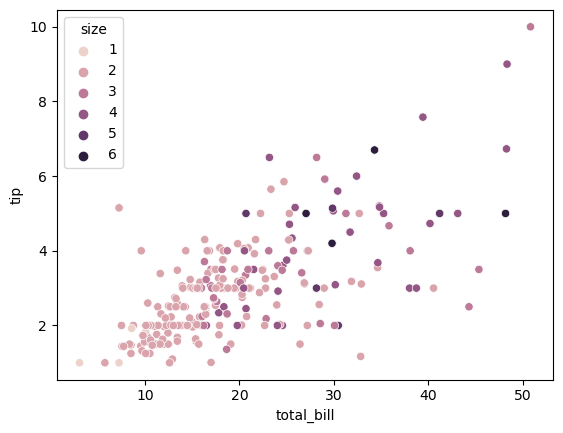

In [42]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'size')

<Axes: xlabel='total_bill', ylabel='tip'>

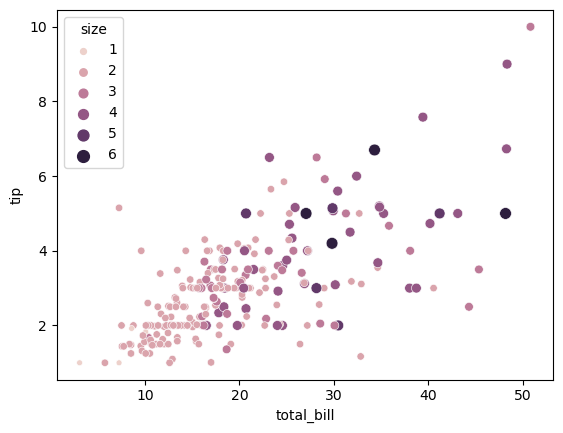

In [43]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'size', size='size', legend='full')

<Axes: xlabel='total_bill', ylabel='tip'>

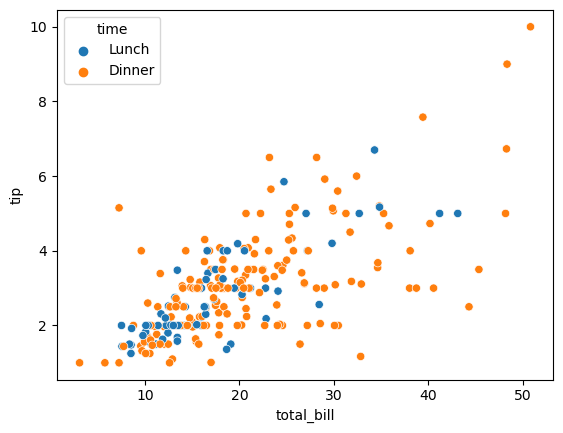

In [44]:
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

In [ ]:
#Больше всего тратят в субботу и воскресенье. Мужчины оставляют больше чаевых.
#Курящие женщины склоны больше оставлять чаевые. За ужин посетители больше оставляют чаевые
# Средний чек колеблется в промежутке от 13 до 22
#чаевые больше оставляли в обед
#В зависимости от размера у нас увеличиваются общая сумма счета и размер чаевых
#sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'size')
#c размером порции сумма счета возрастает
# sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'size', size='size', legend='full')
#с ростом общего чека растут и чаевые, что намекает на существование зависимости между этими случайными величинами. - sns.scatterplot(x='total_bill', y='tip', data=tips)
#в вечернее время больше заказов и более высокое среднее значение чаевых.- sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)